In [19]:
#Load our libraries
import pandas as pd

In [ ]:
#Read in the data
data = pd.read_csv("EURUSD Market Data As Series Multiple Strategy Analysis.csv")

#The optimal holding period suggested by our MT5 Genetic optimizer
HORIZON = 38

#Calculate the true market return
data['Return'] = data['True Close'].shift(-HORIZON) - data['True Close']

#The action suggested by our first strategy, MA Cross
data['Action 1'] = 0

#The action suggested by our second strategy, RSI Strategy
data['Action 2'] = 0

#Buy conditions
data.loc[data['True MA C'] > data['True MA O'],'Action 1'] = 1
data.loc[data['True RSI'] > 50,'Action 2'] = 1

#Sell conditions
data.loc[data['True MA C'] < data['True MA O'],'Action 1'] = -1
data.loc[data['True RSI'] < 50,'Action 2'] = -1

#Perform a linear transformation of the true market return, using our trading stragies
data['Return 1'] = data['Return'] * data['Action 1']
data['Return 2'] = data['Return'] * data['Action 2']

data = data.iloc[:-HORIZON,:]

Time  True Open  True High  True Low  True Close  \
0      2011.03.29 00:00:00    1.40725    1.40882   1.40630     1.40760   
1      2011.03.29 03:00:00    1.40759    1.41235   1.40719     1.41158   
2      2011.03.29 06:00:00    1.41159    1.41484   1.41085     1.41450   
3      2011.03.29 09:00:00    1.41451    1.41472   1.40601     1.40639   
4      2011.03.29 12:00:00    1.40637    1.40976   1.40469     1.40668   
...                    ...        ...        ...       ...         ...   
29956  2025.06.30 15:00:00    1.17386    1.17718   1.17335     1.17658   
29957  2025.06.30 18:00:00    1.17658    1.17881   1.17646     1.17868   
29958  2025.06.30 21:00:00    1.17811    1.17909   1.17737     1.17864   
29959  2025.07.01 00:00:00    1.17864    1.18077   1.17779     1.17883   
29960  2025.07.01 03:00:00    1.17882    1.17939   1.17803     1.17864   

       True MA C  True MA O   True RSI     Open     High      Low    Close  \
0       1.405703   1.405611  47.243581 -0.01566 -0.01574 -0.01610 -0.01490   
1       1.405820   1.405650  51.106877 -0.01490 -0.01244 -0.01387 -0.00955   
2       1.405992   1.405767  53.702397 -0.00951 -0.00695 -0.00703 -0.00663   
3       1.405999   1.405941  46.541915 -0.00661 -0.00705 -0.01324 -0.01406   
4       1.406013   1.405949  46.806562 -0.01405 -0.01158 -0.01457 -0.01313   
...          ...        ...        ...      ...      ...      ...      ...   
29956   1.159177   1.158763  67.060888  0.01675  0.01633  0.01624  0.01678   
29957   1.159563   1.159116  69.132263  0.01677  0.01793  0.01782  0.01866   
29958   1.159941   1.159492  69.045964  0.01809  0.01767  0.01737  0.01756   
29959   1.160315   1.159872  69.236310  0.01756  0.01853  0.01982  0.01958   
29960   1.160677   1.160247  68.794875  0.01957  0.01759  0.01884  0.01780   

       MA Close 2  MA Open 2     RSI 10   Return  Action 1  Action 2  \
0        0.007154   0.007513 -19.949454  0.01230         1        -1   
1        0.006823   0.007069 -14.069920  0.01039         1         1   
2        0.006557   0.006741 -11.474400  0.00597         1         1   
3        0.006149   0.006477 -17.594773  0.01334         1        -1   
4        0.005767   0.006070 -16.340449  0.01347         1        -1   
...           ...        ...        ...      ...       ...       ...   
29956    0.010579   0.010534   4.940883 -0.00362         1         1   
29957    0.010739   0.010658   6.774704 -0.00482         1         1   
29958    0.010874   0.010805   5.537827 -0.00797         1         1   
29959    0.011046   0.010939   9.042667 -0.00804         1         1   
29960    0.011180   0.011110   6.802811 -0.00498         1         1   

       Return 1  Return 2  
0       0.01230  -0.01230  
1       0.01039   0.01039  
2       0.00597   0.00597  
3       0.01334  -0.01334  
4       0.01347  -0.01347  
...         ...       ...  
29956  -0.00362  -0.00362  
29957  -0.00482  -0.00482  
29958  -0.00797  -0.00797  
29959  -0.00804  -0.00804  
29960  -0.00498  -0.00498  

[29961 rows x 20 columns]

In [ ]:
#Drop our back test data
_    = data.iloc[-((365 * 2 * 6)):,:]
data = data.iloc[:-((365 * 2 * 6)),:]

Time  True Open  True High  True Low  True Close  \
0      2011.03.29 00:00:00    1.40725    1.40882   1.40630     1.40760   
1      2011.03.29 03:00:00    1.40759    1.41235   1.40719     1.41158   
2      2011.03.29 06:00:00    1.41159    1.41484   1.41085     1.41450   
3      2011.03.29 09:00:00    1.41451    1.41472   1.40601     1.40639   
4      2011.03.29 12:00:00    1.40637    1.40976   1.40469     1.40668   
...                    ...        ...        ...       ...         ...   
25576  2023.05.25 21:00:00    1.07204    1.07277   1.07149     1.07234   
25577  2023.05.26 00:00:00    1.07233    1.07373   1.07189     1.07345   
25578  2023.05.26 03:00:00    1.07340    1.07426   1.07340     1.07369   
25579  2023.05.26 06:00:00    1.07370    1.07444   1.07253     1.07317   
25580  2023.05.26 09:00:00    1.07316    1.07587   1.07255     1.07525   

       True MA C  True MA O   True RSI     Open     High      Low    Close  \
0       1.405703   1.405611  47.243581 -0.01566 -0.01574 -0.01610 -0.01490   
1       1.405820   1.405650  51.106877 -0.01490 -0.01244 -0.01387 -0.00955   
2       1.405992   1.405767  53.702397 -0.00951 -0.00695 -0.00703 -0.00663   
3       1.405999   1.405941  46.541915 -0.00661 -0.00705 -0.01324 -0.01406   
4       1.406013   1.405949  46.806562 -0.01405 -0.01158 -0.01457 -0.01313   
...          ...        ...        ...      ...      ...      ...      ...   
25576   1.083415   1.083628  34.643435 -0.00519 -0.00448 -0.00458 -0.00454   
25577   1.083218   1.083404  38.165081 -0.00455 -0.00573 -0.00482 -0.00538   
25578   1.083029   1.083206  38.907782 -0.00543 -0.00667 -0.00537 -0.00719   
25579   1.082834   1.083018  37.879160 -0.00717 -0.00793 -0.00592 -0.00544   
25580   1.082684   1.082822  44.052801 -0.00545 -0.00703 -0.00567 -0.00674   

       MA Close 2  MA Open 2     RSI 10   Return  Action 1  Action 2  \
0        0.007154   0.007513 -19.949454  0.01230         1        -1   
1        0.006823   0.007069 -14.069920  0.01039         1         1   
2        0.006557   0.006741 -11.474400  0.00597         1         1   
3        0.006149   0.006477 -17.594773  0.01334         1        -1   
4        0.005767   0.006070 -16.340449  0.01347         1        -1   
...           ...        ...        ...      ...       ...       ...   
25576   -0.007009  -0.007070   4.333309  0.00407        -1        -1   
25577   -0.006977  -0.007020   2.197178  0.00274        -1        -1   
25578   -0.006981  -0.006989  -2.296427  0.00235        -1        -1   
25579   -0.006951  -0.006993   0.232187  0.00336        -1        -1   
25580   -0.006947  -0.006962  -0.968761  0.00188        -1        -1   

       Return 1  Return 2  
0       0.01230  -0.01230  
1       0.01039   0.01039  
2       0.00597   0.00597  
3       0.01334  -0.01334  
4       0.01347  -0.01347  
...         ...       ...  
25576  -0.00407  -0.00407  
25577  -0.00274  -0.00274  
25578  -0.00235  -0.00235  
25579  -0.00336  -0.00336  
25580  -0.00188  -0.00188  

[25581 rows x 20 columns]

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Return 2'>

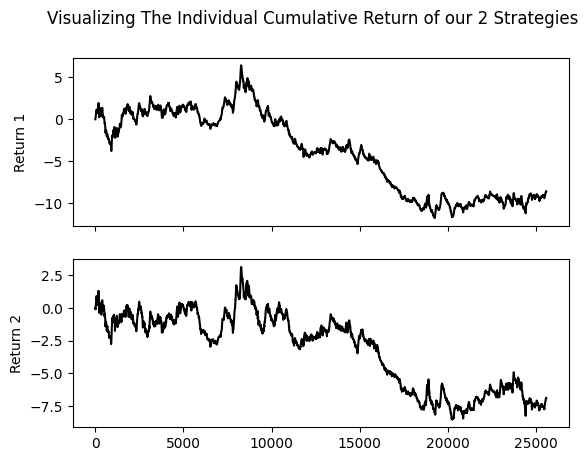

In [23]:
fig , axs = plt.subplots(2,1,sharex=True)

fig.suptitle('Visualizing The Individual Cumulative Return of our 2 Strategies')

sns.lineplot(data['Return 1'].cumsum(),ax=axs[0],color='black')

sns.lineplot(data['Return 2'].cumsum(),ax=axs[1],color='black')


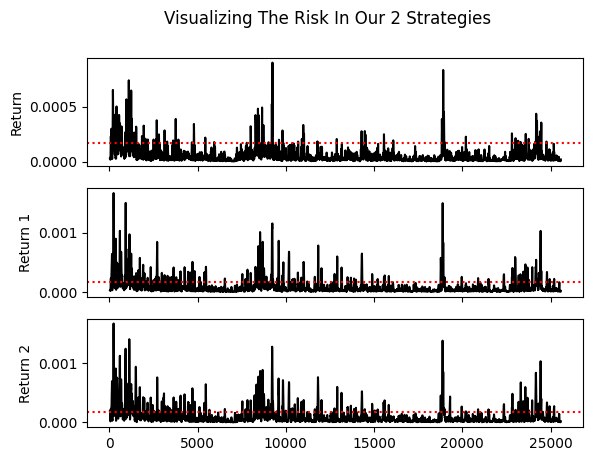

In [24]:
fig , axs = plt.subplots(3,1,sharex=True)

fig.suptitle('Visualizing The Risk In Our 2 Strategies')

sns.lineplot(data['Return'].rolling(window=HORIZON).var(),ax=axs[0],color='black')
axs[0].axhline(data['Return'].var(),color='red',linestyle=':')

sns.lineplot(data['Return 1'].rolling(window=HORIZON).var(),ax=axs[1],color='black')
axs[1].axhline(data['Return 1'].var(),color='red',linestyle=':')

sns.lineplot(data['Return 2'].rolling(window=HORIZON).var(),ax=axs[2],color='black')
axs[2].axhline(data['Return 2'].var(),color='red',linestyle=':')

<Axes: title={'center': 'Correlation Between Market Return And Strategy Returns'}>

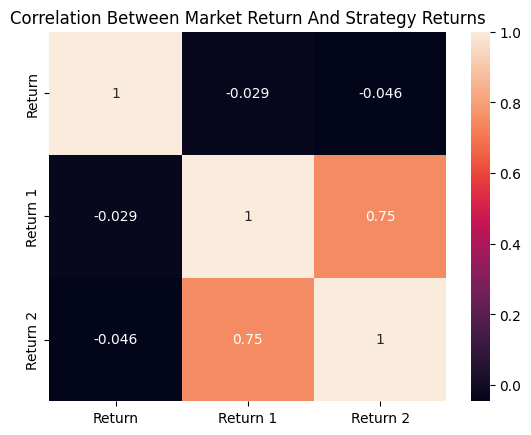

In [25]:
plt.title('Correlation Between Market Return And Strategy Returns')
sns.heatmap(data.loc[:,['Return','Return 1','Return 2']].corr(),annot=True)

In [26]:
#Gether inputs
X = data.iloc[:,1:15]

#Both Strategies will earn equal reward
data['Target 1'] = 0 
data['Target 2'] = 0 

#Strategy 1 is more profitable
data.loc[data['Return 1'] > data['Return 2'],'Target 1'] = 1

#Strategy 2 is more profitable
data.loc[data['Return 2'] > data['Return 1'],'Target 2'] = 1

#Classical Target
data['Classical Target'] = 0

data.loc[data['Return'] > 0,'Classical Target'] = 1

C:\Users\Westwood\AppData\Local\Temp\ipykernel_19680\1408047249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target 1'] = 0
C:\Users\Westwood\AppData\Local\Temp\ipykernel_19680\1408047249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target 2'] = 0
C:\Users\Westwood\AppData\Local\Temp\ipykernel_19680\1408047249.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
#Loading our scikit learn libraries
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Prepare the data for time series modelling
tscv = TimeSeriesSplit(n_splits=5,gap=HORIZON)

Z1 = X.mean()
Z2 = X.std()

X = ((X-X.mean()) / X.std())

Text(0.5, 1.0, 'Outperforming The Classical Target of Direct Price Prediction')

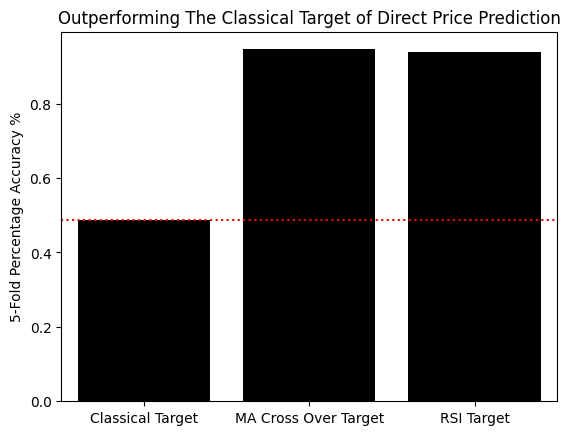

In [ ]:
#Measuring our accuracy on our new target
res = []

model = LinearDiscriminantAnalysis()

res.append(np.mean(np.abs(cross_val_score(model,X,data['Classical Target'],cv=tscv,scoring='accuracy'))))

model = LinearDiscriminantAnalysis()

res.append(np.mean(np.abs(cross_val_score(model,X,data['Target 1'],cv=tscv,scoring='accuracy'))))

model = LinearDiscriminantAnalysis()

res.append(np.mean(np.abs(cross_val_score(model,X,data['Target 2'],cv=tscv,scoring='accuracy',n_jobs=-1))))

sns.barplot(res,color='black')
plt.xticks([0,1,2],['Classical Target','MA Cross Over Target','RSI Target'])
plt.axhline(res[0],linestyle=':',color='red')
plt.ylabel('5-Fold Percentage Accuracy %')
plt.title('Outperforming The Classical Target of Direct Price Prediction')

In [ ]:
#Use random search to build a neural network for our market data

#Initialize the model
model = MLPRegressor(shuffle=False,early_stopping=False)


distributions = {'solver':['lbfgs','adam','sgd'],
                 'hidden_layer_sizes':[(X.shape[1],2,10,20),(X.shape[1],30,50,10),(X.shape[1],14,14,14),(X.shape[1],5,20,2),(X.shape[1],1,2,3,4,5,6,10),(X.shape[1],1,14,14,1)],
                 'activation':['relu','identity','logistic','tanh']
                 }

rscv = RandomizedSearchCV(model,distributions,n_jobs=-1,n_iter=50)

rscv.fit(X,data.loc[:,['Target 1','Target 2']])

NameError: name 'MLPRegressor' is not defined

In [ ]:
#Exporting our model to ONNX 
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_types = [('float_input',FloatTensorType([1,X.shape[1]]))]
final_types = [('float_output',FloatTensorType([2,1]))]

model = rscv.best_estimator_

model.fit(X,data.loc[:,['Target 1','Target 2']])

onnx_proto = convert_sklearn(model=model,initial_types=initial_types,final_types=final_types,target_opset=12)

onnx.save(onnx_proto,'EURUSD NN MSA.onnx')

In [31]:
#Viewing our ONNX graph in netron
import netron
netron.start('../EURUSD NN MSA.onnx')

Serving '../EURUSD NN MSA.onnx' at http://localhost:8080


('localhost', 8080)